#전처리모음

##준비단계

In [1]:
import pandas as pd

In [2]:
# ### 한글 폰트 설치
# !apt-get install -y fonts-nanum
# !fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# # 설치 후 colab의 경우 Runtime > Restart session 필요

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import scipy.stats as stats

##함수모음

In [5]:
def make_pivot(df, index) :
  pivot_table = pd.pivot_table(df,
                              index=index,
                              aggfunc='size').reset_index(name='개수')
  return pivot_table

In [6]:
def make_pivot_by_two(df) :
  pivot_table = pd.pivot_table(df,
                              index=['유형', '대상'],
                              aggfunc='size').reset_index(name='개수')
  return pivot_table

## 데이터 불러오기

In [7]:
df_choenan_policy = pd.read_csv('/content/drive/MyDrive/천안 공공데이터 활용 정책제안 공모전/dataset/정책현황_수정필요/천안시_정책현황.csv')

In [8]:
df_choenan_facility = pd.read_csv('/content/drive/MyDrive/천안 공공데이터 활용 정책제안 공모전/dataset/정책현황_수정필요/천안시_시설현황.csv')

In [9]:
df_choenan_center = pd.read_csv('/content/drive/MyDrive/천안 공공데이터 활용 정책제안 공모전/dataset/정책현황_수정필요/천안시_센터현황.csv')

In [10]:
df_hwaseong_policy = pd.read_csv('/content/drive/MyDrive/천안 공공데이터 활용 정책제안 공모전/dataset/정책현황_수정필요/화성시_정책현황.csv')

In [12]:
# df_hwaseong_facility = pd.read_csv('/content/drive/MyDrive/천안 공공데이터 활용 정책제안 공모전/dataset/정책현황_수정필요/화성시_시설현황.csv')

In [13]:
df_pyeongtaek_policy = pd.read_csv('/content/drive/MyDrive/천안 공공데이터 활용 정책제안 공모전/dataset/정책현황_수정필요/평택시_정책현황.csv')

#데이터 시각화

### 천안시

#### 정책모음

In [14]:
make_pivot(df_choenan_policy, '유형')

,유형,개수
0,교육,2
1,비용,39
2,시설,2
3,식품,1
4,용품,6
5,의료,15
6,주택,1


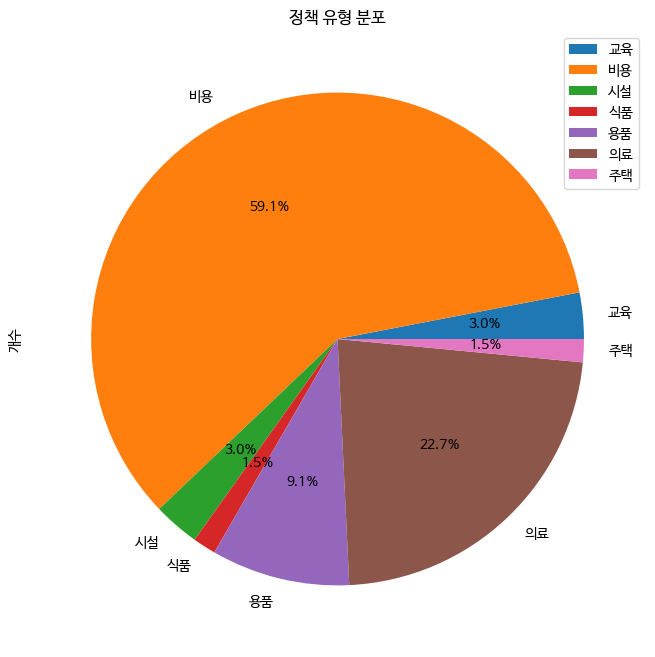

In [62]:
pie_chart_data = make_pivot(df_choenan_policy, '유형')
pie_chart_data.set_index('유형').plot(kind='pie', y='개수', autopct='%1.1f%%', figsize=(8, 8))
plt.title('정책 유형 분포')
plt.show()

In [63]:
pie_chart_data.rename(columns={'개수':'천안'}, inplace=True)

In [64]:
df_policy_type = pie_chart_data

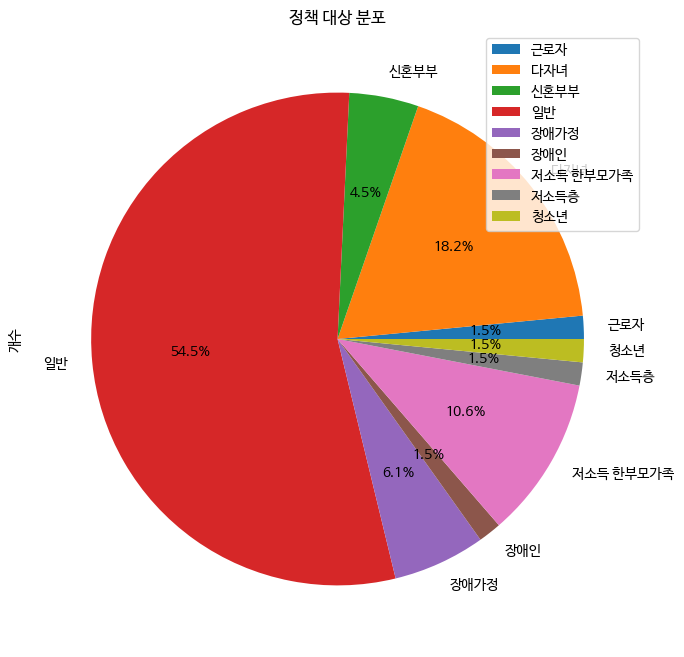

In [65]:
pie_chart_data = make_pivot(df_choenan_policy, '대상')
pie_chart_data.set_index('대상').plot(kind='pie', y='개수', autopct='%1.1f%%', figsize=(8, 8))
plt.title('정책 대상 분포')
plt.show()

In [66]:
make_pivot(df_choenan_policy, ['유형', '대상'])

,유형,대상,개수
0,교육,일반,1
1,교육,저소득 한부모가족,1
2,비용,근로자,1
3,비용,다자녀,10
4,비용,신혼부부,3
5,비용,일반,16
6,비용,장애가정,4
7,비용,장애인,1
8,비용,저소득 한부모가족,4
9,시설,일반,1


#### 센터현황

#### 시설현황

### 화성시

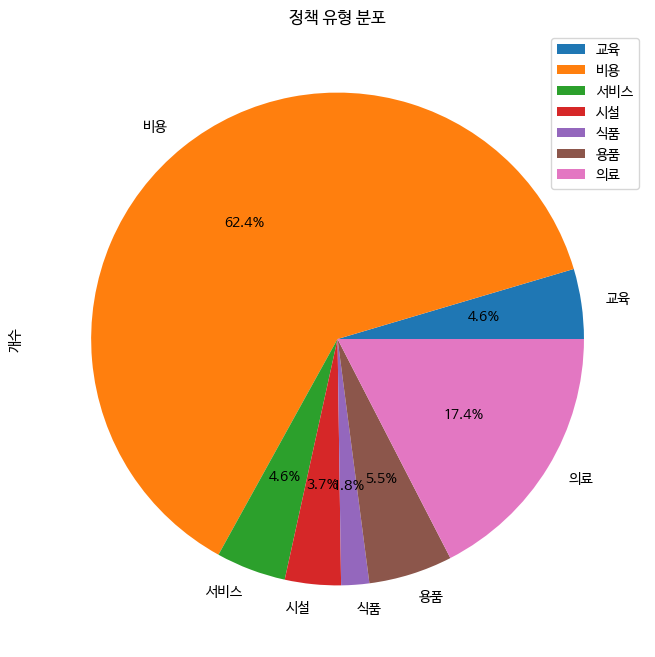

In [67]:
pie_chart_data = make_pivot(df_hwaseong_policy, '유형')
pie_chart_data.set_index('유형').plot(kind='pie', y='개수', autopct='%1.1f%%', figsize=(8, 8))
plt.title('정책 유형 분포')
plt.show()

In [68]:
pie_chart_data.rename(columns={'개수':'화성'}, inplace=True)

In [69]:
merged_df = pd.merge(df_policy_type, pie_chart_data, on='유형', how='outer')

In [70]:
merged_df

,유형,천안,화성
0,교육,2.0,5.0
1,비용,39.0,68.0
2,시설,2.0,4.0
3,식품,1.0,2.0
4,용품,6.0,6.0
5,의료,15.0,19.0
6,주택,1.0,NaN
7,서비스,NaN,5.0


#### 정책현황

In [71]:
make_pivot(df_hwaseong_policy, '대상')

,대상,개수
0,가정위탁아동,9
1,근로자,1
2,기타,3
3,다자녀,22
4,일반,53
5,입양아동,5
6,장애인,2
7,장애입양아동,5
8,저소득층,8
9,청소년,1


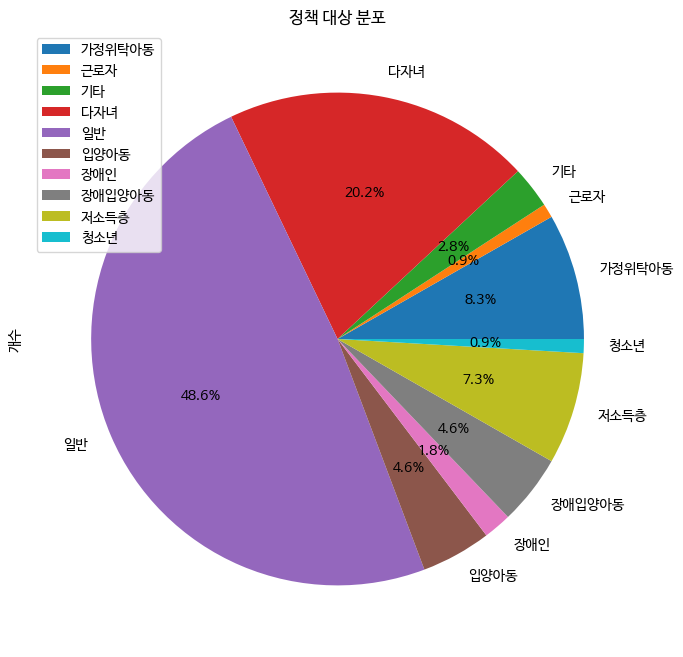

In [72]:
pie_chart_data = make_pivot(df_hwaseong_policy, '대상')
pie_chart_data.set_index('대상').plot(kind='pie', y='개수', autopct='%1.1f%%', figsize=(8, 8))
plt.title('정책 대상 분포')
plt.show()

### 평택시

#### 정책현황

In [73]:
pie_chart_data = make_pivot(df_pyeongtaek_policy, '유형')

In [74]:
pie_chart_data.rename(columns={'개수':'평택'}, inplace=True)

In [75]:
merged_df = pd.merge(merged_df, pie_chart_data, on='유형', how='outer')

In [76]:
merged_df

,유형,천안,화성,평택
0,교육,2.0,5.0,NaN
1,비용,39.0,68.0,29.0
2,시설,2.0,4.0,2.0
3,식품,1.0,2.0,NaN
4,용품,6.0,6.0,1.0
5,의료,15.0,19.0,12.0
6,주택,1.0,NaN,2.0
7,서비스,NaN,5.0,1.0
8,돌봄,NaN,NaN,1.0
9,휴가,NaN,NaN,1.0


In [77]:
# NaN 값을 0으로 대체
merged_df.fillna(0, inplace=True)

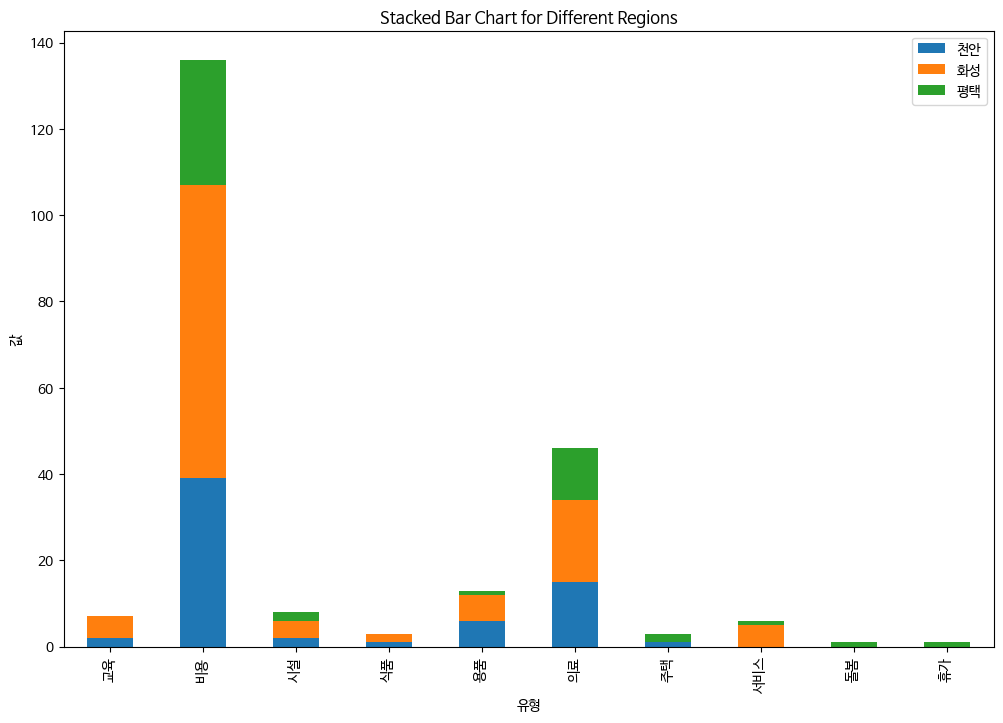

In [78]:
# '유형'을 인덱스로 설정
merged_df.set_index('유형', inplace=True)

# 누적 바 차트 생성
merged_df.plot(kind='bar', stacked=True, figsize=(12, 8))

# 차트 제목 및 레이블 설정
plt.title('Stacked Bar Chart for Different Regions')
plt.xlabel('유형')
plt.ylabel('값')

# 차트 표시
plt.show()